In [1]:
from unittest import skipIf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../DATA/Advertising.csv')

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
X = df.drop('sales', axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
poly_features = polynomial_converter.fit_transform(X)

In [9]:
poly_features.shape

(200, 9)

In [10]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [11]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [12]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [13]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression(fit_intercept=True)

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
test_predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
MSE = mean_squared_error(y_test, test_predictions)
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [22]:
print(f'MSE: {MSE}, MAE: {MAE}, RMSE: {RMSE}')

MSE: 0.44175055104034316, MAE: 0.4896798044803556, RMSE: 0.6646431757269032


In [23]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [24]:
model.intercept_

5.125557423132683

In [26]:
test_rmse_errors = []

train_rmse_errors = []

for d in range(1, 10):
    
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=.3, random_state=101)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

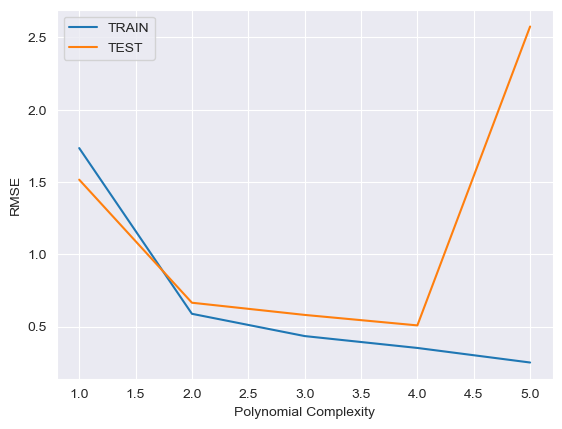

In [27]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

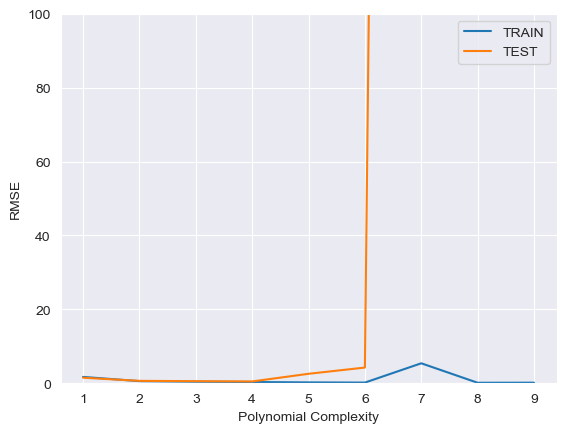

In [28]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In [29]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [30]:
final_model = LinearRegression()

In [31]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [32]:
from joblib import dump, load

In [33]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [34]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [35]:
loaded_poly = load('final_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [36]:
campaign = [[149,22,12]]

In [37]:
campaign_poly = loaded_poly.transform(campaign)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [38]:
campaign_poly 

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [39]:
final_model.predict(campaign_poly)

array([14.64501014])